                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.255
Model:                            OLS   Adj. R-squared:                  0.213
Method:                 Least Squares   F-statistic:                     6.156
Date:                Thu, 06 Apr 2023   Prob (F-statistic):             0.0232
Time:                        13:25:40   Log-Likelihood:                -85.985
No. Observations:                  20   AIC:                             176.0
Df Residuals:                      18   BIC:                             178.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.8664     49.439     -0.058      0.9

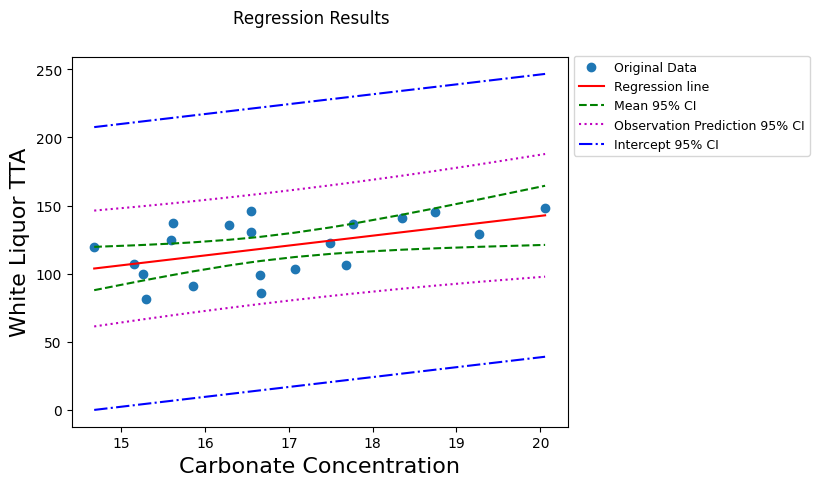

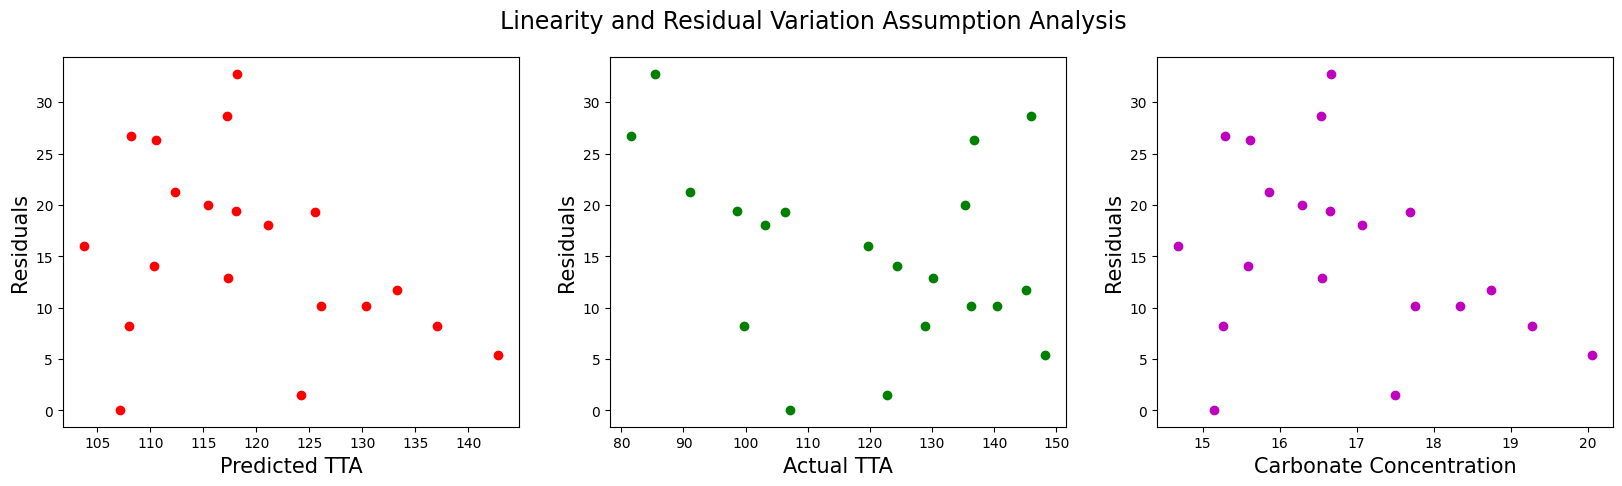

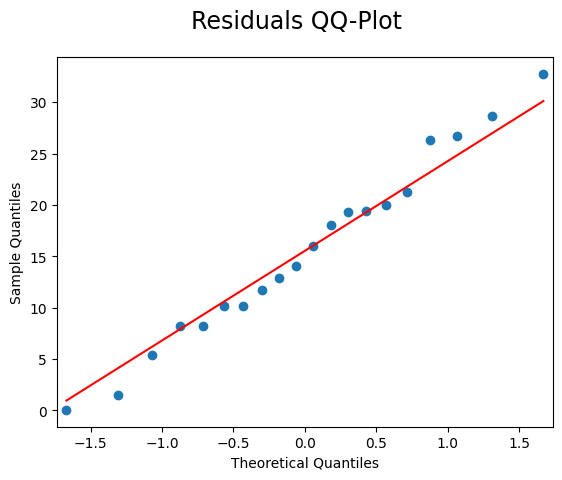

In [32]:
#Import all packages. Ensure all packages are installed prior to running
#Use pip install package-name
import csv
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import statsmodels
import statsmodels.api as sm

# Calculates and returns Sxx, Syy, and Sxy
def getStatVals(x, y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    Sxx = 0;
    Syy = 0;
    Sxy = 0;
    for i in range(0, len(x)):
        Sxx += (x[i] - x_mean)**2
        Syy += (y[i] - y_mean)**2
        Sxy += (x[i] - x_mean)*(y[i] - y_mean)
    return Sxx, Syy, Sxy

# Gets the 95% Mean Confidence interval
def getCI(x, crit_t, MSE, Sxx):
    x_mean = np.mean(x)
    n = len(x)
    CI = []
    for i in range(0, len(x)):
        conf95 = crit_t*np.sqrt(MSE * ((1/n) + ((x[i] - x_mean)**2)/Sxx))
        CI.append(conf95)
    return CI
 
# Gets the 95% Observation Confidence Interval
def getPredictCI(x, crit_t, MSE, Sxx):
    x_mean = np.mean(x)
    n = len(x)
    CI = []
    for i in range(0, len(x)):
        conf95 = crit_t*np.sqrt(MSE * (1 + (1/n) + ((x[i] - x_mean)**2)/Sxx))
        CI.append(conf95)
    return CI
    



#critical t value for dof 18 and 95% two tailed
crit_t =  2.101    
# Use the below command if the directory is incorrect!
#os.chdir(r'C:\Users\uddha\OneDrive\Documents\GitHub\PythonExperiments\Stats')  
carbonateConcentration = []
liqTTA = []
#print(os.getcwd())
try:
    # Read data
    with open('Group_67_Question_2_Data.csv') as csvfile:
        reader = csv.DictReader(csvfile)
        
        for row in reader:
            carbonateConcentration.append(float(row['White Liquor Carbonate']))
            liqTTA.append(float(row['White Liquor TTA']))
except:
    # If you are not sure what your current directory is, use the commented print(os.getcwd()) above in a separated code cell.
    print("You probably haven't selected the right path. Fix os.chdir and ensure it points to the data file!")
else: 
    # Convert the data into a Pandas DataFrame to use the formulas framework
    # in statsmodels
    data = pandas.DataFrame({'x': carbonateConcentration, 'y': liqTTA})

    # Fit the model
    model = ols("y ~ x", data).fit()
    # Peform analysis of variance on fitted linear model
    anova_results = anova_lm(model)
    # Get important parameters
    MSE_residuals = anova_results.mean_sq[1]
    offset, coef = model._results.params
    
    # Predicted TTA and residuals
    y_hat = np.array(carbonateConcentration)*coef + offset
    residuals = abs(y_hat - liqTTA)
    
    # Add Columns to data for printing
    data['y_pred'] = y_hat
    data['residual'] = residuals

    # Print all important results
    print(model.summary())
    print('\nANOVA results')
    print(anova_results)
    print(data)
    print('\nRoot Mean Squared Error: ' + str(np.sqrt(MSE_residuals)))
    print('\nr-value: ' + str(np.sqrt(model._results.rsquared)))

    # Calculate Sxx, Syy, and Sxy
    Sxx, Syy, Sxy = getStatVals(carbonateConcentration, liqTTA)
    
    # Get the Confidence Interval
    CI = getCI(carbonateConcentration, crit_t, MSE_residuals, Sxx)
    
    # Get the Prediction Interval
    predictCI = getPredictCI(carbonateConcentration, crit_t, MSE_residuals, Sxx)
    
    # Get the arrays for both sides of the interval
    lowerPredict = y_hat - np.array(predictCI)
    upperPredict = y_hat + np.array(predictCI)
    lower = y_hat - np.array(CI)
    upper = y_hat + np.array(CI)
    
    #Create the model figure (First since it is most important)
    regressionFig, regressionAx = plt.subplots()
    
    # We still plot on the assumption figures first since we will sort the data soon
    linearityFig, linearityAx = plt.subplots(1, 3)
    linearityFig.suptitle('Linearity and Residual Variation Assumption Analysis', fontsize=17)
    linearityFig.set_figwidth(20)
    
    # Plot Data and Label
    linearityAx[0].plot(y_hat, residuals, 'or')
    linearityAx[0].set_xlabel('Predicted TTA', fontsize = 15)
    linearityAx[0].set_ylabel('Residuals', fontsize = 15)
    linearityAx[1].plot(liqTTA, residuals, 'og')
    linearityAx[1].set_xlabel('Actual TTA', fontsize = 15)
    linearityAx[1].set_ylabel('Residuals', fontsize = 15)
    linearityAx[2].plot(carbonateConcentration, residuals, 'om')
    linearityAx[2].set_xlabel('Carbonate Concentration', fontsize = 15)
    linearityAx[2].set_ylabel('Residuals', fontsize = 15)
    
    # Plot Raw Data
    regressionAx.plot(carbonateConcentration, liqTTA, 'o', label='Original Data')
    # Sort all other data (Line plotting is corrupt otherwise)
    y_hat.sort()
    carbonateConcentration.sort()
    lower.sort()
    upper.sort()
    lowerPredict.sort()
    upperPredict.sort()
    # Plot Data
    regressionAx.plot(carbonateConcentration, y_hat, 'r', label='Regression line')
    regressionAx.plot(carbonateConcentration, lower, '--g', label='Mean 95% CI')
    regressionAx.plot(carbonateConcentration, upper, '--g', label='_Mean 95% CI')
    regressionAx.plot(carbonateConcentration, lowerPredict, ':m', label='Observation Prediction 95% CI')
    regressionAx.plot(carbonateConcentration, upperPredict, ':m', label='_Observation Prediction 95% CI')
    
    
    #Get 95% CI for intercept
    Offset95 = crit_t*model._results.bse[0]
    # Plot 95% CI for intercept
    regressionAx.plot(carbonateConcentration, y_hat + Offset95, '-.b', label='Intercept 95% CI')
    regressionAx.plot(carbonateConcentration, y_hat - Offset95, '-.b', label='_Intercept 95% CI')
    
    # Legend and Axes Labels
    regressionAx.legend(bbox_to_anchor=(1, 1.02), fontsize=9)
    regressionFig.suptitle('Regression Results')
    regressionAx.set_xlabel('Carbonate Concentration', fontsize = 16)
    regressionAx.set_ylabel('White Liquor TTA', fontsize = 16)
    
    # Plot QQ-Plot of residuals
    residualsNormalFig = statsmodels.api.qqplot(residuals, line='s')
    residualsNormalFig.suptitle('Residuals QQ-Plot', fontsize=17)
    
finally:
    print('\nExecution Complete!')
    
    
    


    
    